In [2]:
! pip install xgboost

     |████████████████████████████████| 166.7 MB 11 kB/s s eta 0:00:01


In [3]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#! pip install xgboost
# Import Model Libraries
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Train a base decision tree regressor model on the data
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

### Load Boston Dataset

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Train Test Split

In [6]:
# Split Train/Test Set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(bos.drop(["PRICE"], axis=1), bos["PRICE"],random_state=10, test_size=0.25)

In [7]:
# Examine our dataset
X_train_2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
167,1.80028,0.0,19.58,0.0,0.605,5.877,79.2,2.4259,5.0,403.0,14.7,227.61,12.14
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4.0,304.0,18.4,395.21,10.36
99,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
404,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38


In [8]:
# Examine shape of the dataset
X_train_2.shape

(379, 13)

### Check for any missing values

In [9]:
# Check for any missing values
X_train_2.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

### Tree Ensemble (Boosting)

In [10]:
# Train first base decision tree regressor model on the data
from sklearn.tree import DecisionTreeRegressor
# Fit model
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X_train_2,y_train_2)

DecisionTreeRegressor(max_depth=2)

In [11]:
# Compute errors/residuals on first tree
r1 = y_train_2 - tree_reg1.predict(X_train_2)

In [12]:
# Train second decision tree regressor model on the data
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X_train_2,r1)

DecisionTreeRegressor(max_depth=2)

In [13]:
# Compute errors/residuals on second tree
r2 = r1 - tree_reg2.predict(X_train_2)

In [14]:
# Train third decision tree regressor model on the data
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X_train_2,r2)

DecisionTreeRegressor(max_depth=2)

### ENSEMBLE: Combine all three tree predictions

In [15]:
# Add up the predictions of each tree model, which is our ensemble of three trees
y_pred = sum(tree.predict(X_train_2) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [16]:
# First 10 ENSEMBLE Predictions
y_pred[:10]

array([20.82271957, 20.82271957, 31.52807475, 31.52807475,  8.59384099,
       31.52807475, 31.52807475, 14.05672474, 27.55376228, 20.82271957])

In [17]:
#actual values
y_train_2[:10]

167    23.8
318    23.1
99     33.2
307    28.2
404     8.5
274    32.4
252    29.6
441    17.1
70     24.2
302    26.4
Name: PRICE, dtype: float64

In [18]:
# model prediction
tree_reg1.predict(X_train_2)[:10]

array([21.42047244, 21.42047244, 28.15151515, 28.15151515, 14.65447761,
       28.15151515, 28.15151515, 14.65447761, 28.15151515, 21.42047244])

In [19]:
# Create dataframe of all predictions
predictions = pd.DataFrame(tree_reg1.predict(X_train_2)[:10], columns=['Model_1'])
predictions['Model_2'] = pd.DataFrame(tree_reg2.predict(X_train_2)[:10])
predictions['Model_3'] = pd.DataFrame(tree_reg3.predict(X_train_2)[:10])
predictions['Ensemble'] = pd.DataFrame(y_pred[:10])
predictions['Actual'] = y_train_2.head(10).reset_index()['PRICE']

# Display predictions
predictions

,Model_1,Model_2,Model_3,Ensemble,Actual
0,21.420472,-0.988859,0.391106,20.822720,23.8
1,21.420472,-0.988859,0.391106,20.822720,23.1
2,28.151515,2.985454,0.391106,31.528075,33.2
3,28.151515,2.985454,0.391106,31.528075,28.2
4,14.654478,-0.988859,-5.071778,8.593841,8.5
5,28.151515,2.985454,0.391106,31.528075,32.4
6,28.151515,2.985454,0.391106,31.528075,29.6
7,14.654478,-0.988859,0.391106,14.056725,17.1
8,28.151515,-0.988859,0.391106,27.553762,24.2
9,21.420472,-0.988859,0.391106,20.822720,26.4


In [20]:
errors = []
for n_estimators in [1,2,3,4,5,6,7,8,9,10]:
    clf = xgb.XGBRegressor(max_depth=2, n_estimators=n_estimators)
    clf.fit(X_train_2, y_train_2, verbose=False)
    errors.append(
        {
            'Tree Count': n_estimators,
            'Average Error': np.average(y_train_2 - clf.predict(X_train_2)),
        })
    
n_estimators_lr = pd.DataFrame(errors).set_index('Tree Count').sort_index()
n_estimators_lr

,Average Error
Tree Count,
1,15.080437
2,10.613207
3,7.474475
4,5.254293
5,3.690262
6,2.607110
7,1.844612
8,1.304301
9,0.922844


<AxesSubplot:title={'center':'Max_Depth Learning Curve'}, xlabel='Tree Count'>

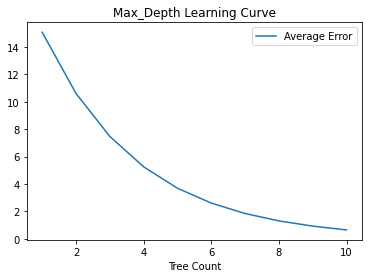

In [21]:
n_estimators_lr.plot(title="Max_Depth Learning Curve")